## Importing required libraries

In [1]:
!pip install torchsummary
!pip install albumentations
from __future__ import print_function
import torch
import torch.optim as optim
from visualize import show_class_samples, show_random_samples,show_image_rgb,show_accuracy_loss,show_misclassified_img
from utils import train_test_dataloader
from model import Net, model_summary, train, test, train_test_loss_accuracy
from torch.optim.lr_scheduler import ReduceLROnPlateau
import model

## Defining the transform, selecting the device type and loading the train/test data using data loader

In [2]:
SEED = 1
# Selecting device as CUDA/CPU
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device used: ", device)

# For reproducibility
torch.manual_seed(SEED)
if cuda:
    torch.cuda.manual_seed(SEED)

# arguments to dataloader
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train and test dataloader are initialized
train_loader, test_loader, classes = train_test_dataloader(dataloader_args)


CUDA Available? True
Device used:  cuda


100%|██████████| 170498071/170498071 [00:01<00:00, 101016312.61it/s]


Extracting /root/data/cifar10/cifar-10-python.tar.gz to /root/data/cifar10
Files already downloaded and verified
Unique classes of images are: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Random images from the CIFAR10 dataset

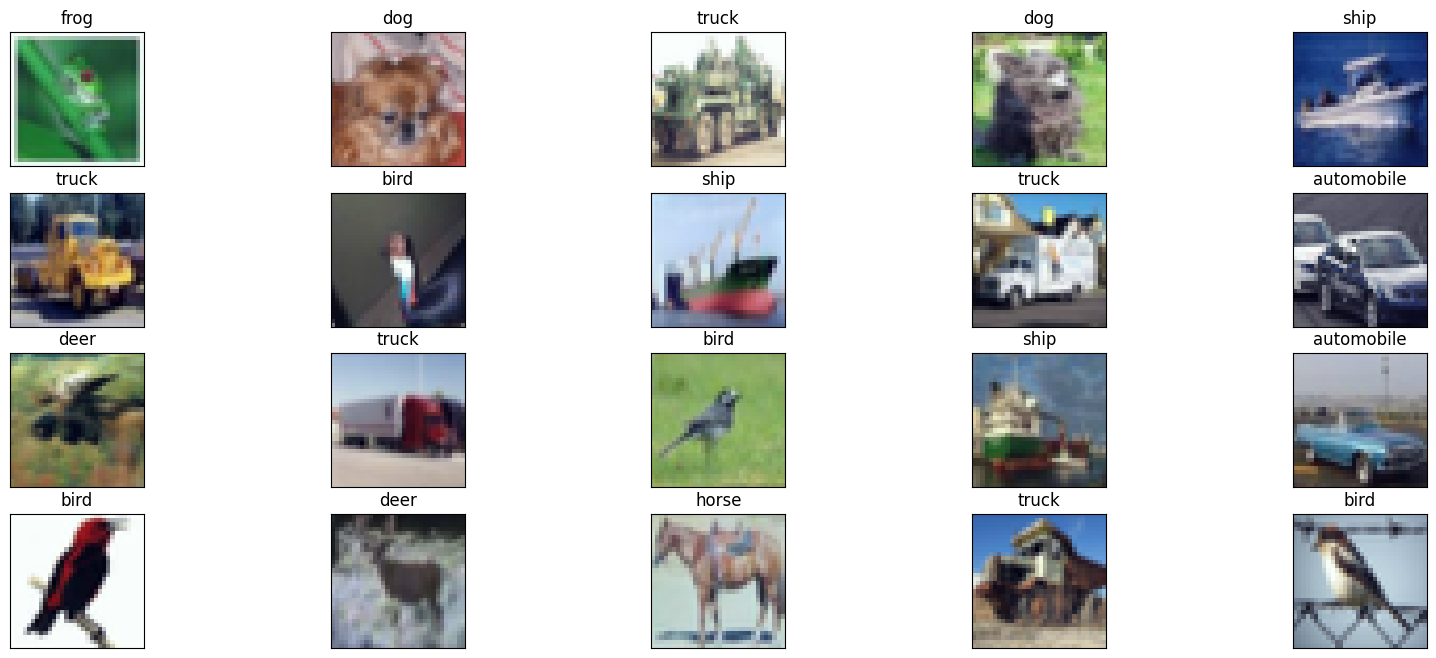

In [3]:
show_random_samples(test_loader, classes)

## Images from each class in the CIFAR10 dataset

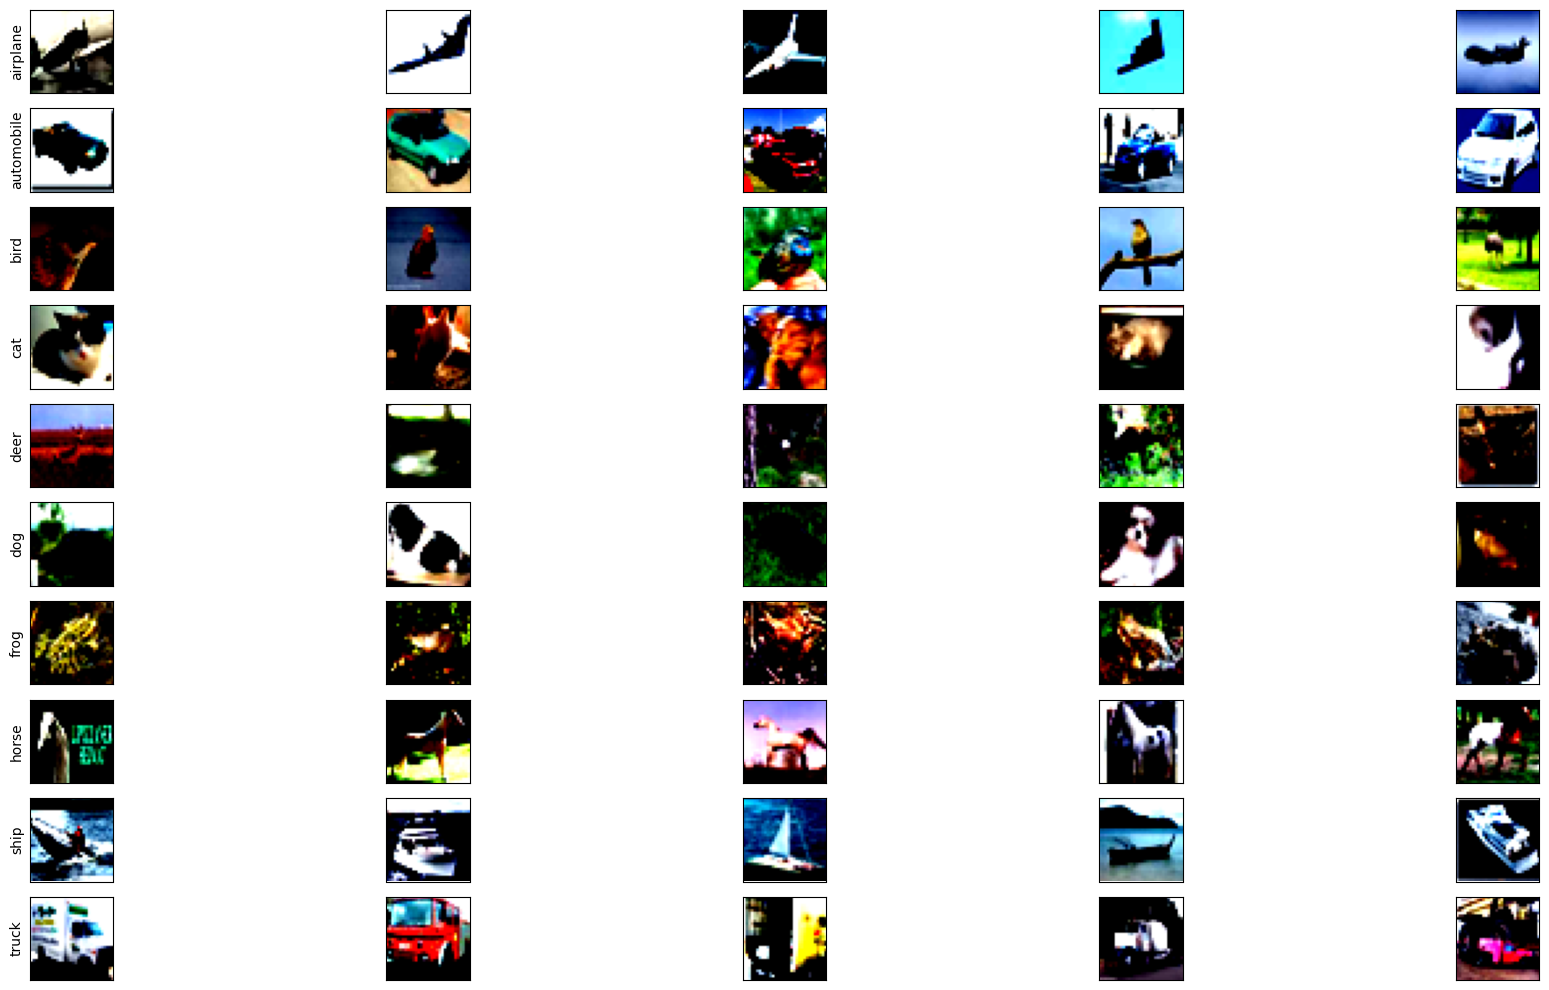

In [4]:
show_class_samples(test_loader, classes)

## Displaying an image and the corresponing red, green and blue channel

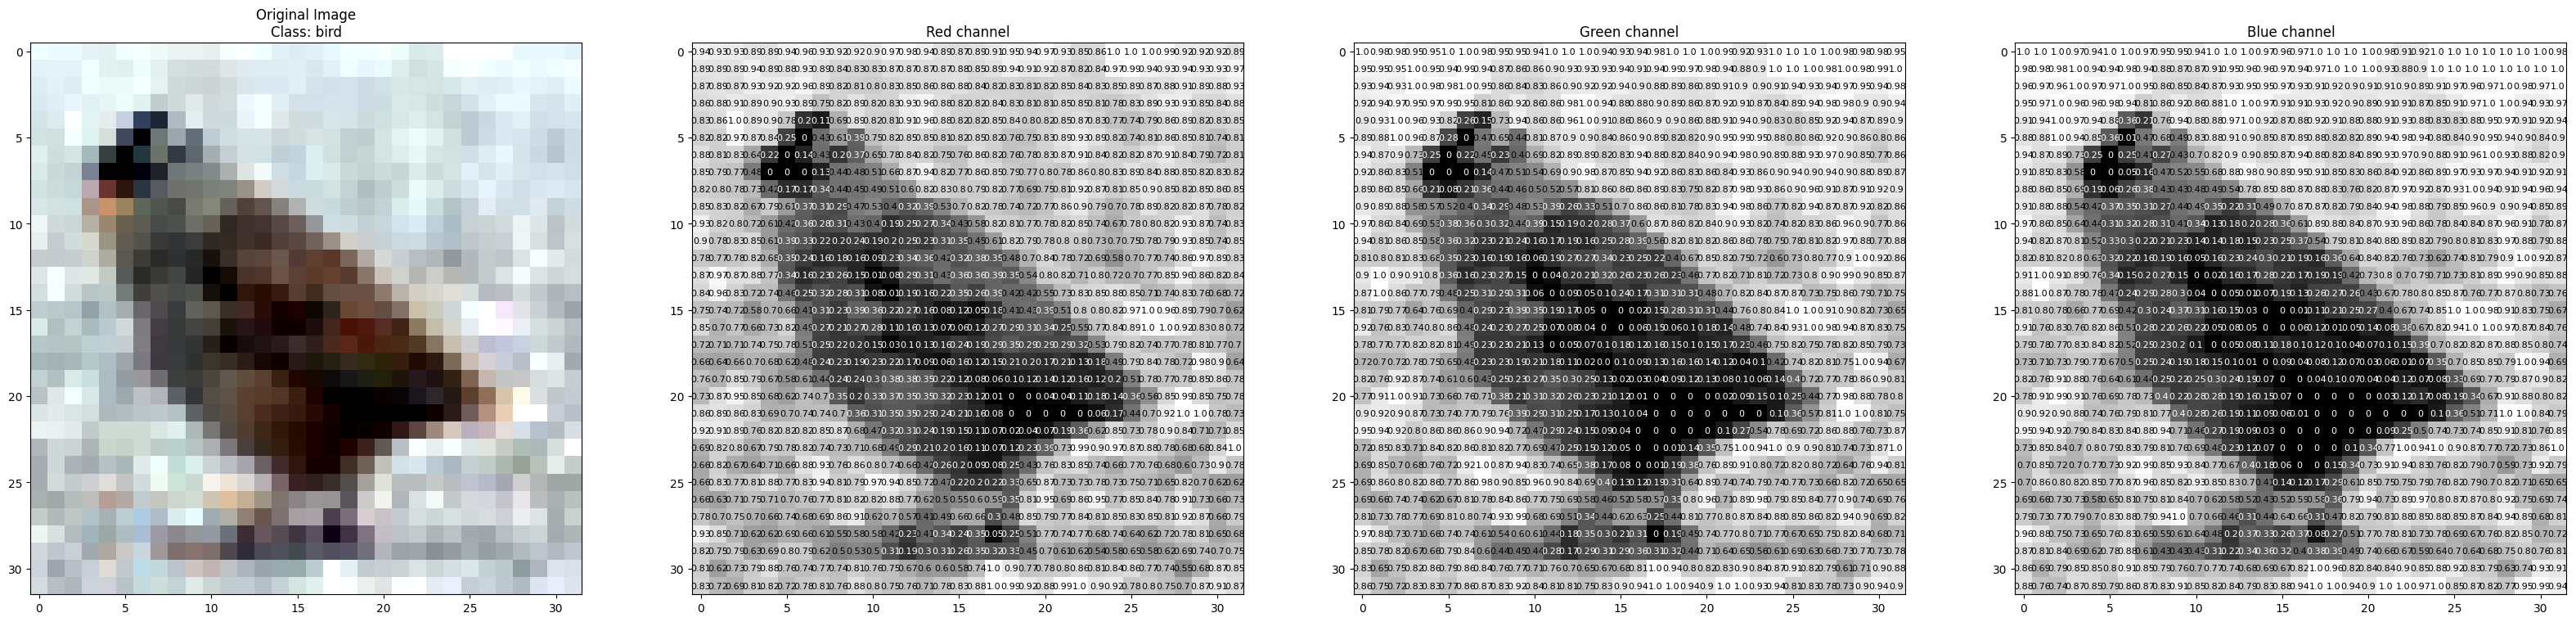

In [5]:
show_image_rgb(test_loader, classes)

## Defining the model and printing the model summary


In [6]:
cnn_model = Net().to(device)

# Model Summary
model_summary(cnn_model, (3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 28, 28]           9,216
             ReLU-10           [-1, 32, 28, 28]               0
      BatchNorm2d-11           [-1, 32, 28, 28]              64
          Dropout-12           [-1, 32, 28, 28]               0
           Conv2d-13           [-1, 16, 28, 28]             512
           Conv2d-14           [-1, 32,

## Defining the optimizer and iterating the train and test functions based on number of epochs

In [7]:
optimizer = optim.SGD(cnn_model.parameters(), lr=0.01, momentum=0.9)
lr_scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=5, verbose=True)

EPOCHS = 100

for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    train(cnn_model, device, train_loader, optimizer, epoch)
    misclassified_images, misclassified_labels, misclassified_predictions = test(cnn_model, device, test_loader)
    lr_scheduler.step(model.test_losses[-1])  # Adjust learning rate based on validation loss

EPOCH: 1


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.45it/s]


Train Accuracy: 33.78%
Train Loss:  1.65
Test Accuracy: 44.91%
Test Loss:  3.01


EPOCH: 2


Batch_id=390: 100%|██████████| 391/391 [00:13<00:00, 27.97it/s]


Train Accuracy: 43.08%
Train Loss:  1.55
Test Accuracy: 52.06%
Test Loss:  2.64


EPOCH: 3


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.52it/s]

Train Accuracy: 47.08%
Train Loss:  1.37


Test Accuracy: 53.75%
Test Loss:  2.56


EPOCH: 4


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.77it/s]

Train Accuracy: 50.77%
Train Loss:  1.08


Test Accuracy: 58.87%
Test Loss:  2.26


EPOCH: 5


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.69it/s]


Train Accuracy: 53.49%
Train Loss:  1.26
Test Accuracy: 61.65%
Test Loss:  2.13


EPOCH: 6


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.37it/s]


Train Accuracy: 55.4%
Train Loss:  1.48
Test Accuracy: 63.62%
Test Loss:  2.04


EPOCH: 7


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.11it/s]


Train Accuracy: 57.37%
Train Loss:  1.22
Test Accuracy: 67.29%
Test Loss:  1.86


EPOCH: 8


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.90it/s]


Train Accuracy: 59.04%
Train Loss:  1.35
Test Accuracy: 66.5%
Test Loss:  1.88


EPOCH: 9


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.42it/s]


Train Accuracy: 60.33%
Train Loss:  0.97
Test Accuracy: 68.97%
Test Loss:  1.78


EPOCH: 10


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.66it/s]


Train Accuracy: 61.4%
Train Loss:  0.99
Test Accuracy: 69.98%
Test Loss:  1.71


EPOCH: 11


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.60it/s]


Train Accuracy: 62.27%
Train Loss:  1.14
Test Accuracy: 71.75%
Test Loss:  1.63


EPOCH: 12


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.63it/s]


Train Accuracy: 62.8%
Train Loss:  1.02
Test Accuracy: 72.09%
Test Loss:  1.58


EPOCH: 13


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.84it/s]


Train Accuracy: 63.62%
Train Loss:  0.8
Test Accuracy: 73.28%
Test Loss:  1.55


EPOCH: 14


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.63it/s]


Train Accuracy: 64.48%
Train Loss:  0.92
Test Accuracy: 74.24%
Test Loss:  1.49


EPOCH: 15


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.61it/s]


Train Accuracy: 65.03%
Train Loss:  1.03
Test Accuracy: 74.46%
Test Loss:  1.47


EPOCH: 16


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.44it/s]


Train Accuracy: 65.51%
Train Loss:  0.95
Test Accuracy: 74.02%
Test Loss:  1.48


EPOCH: 17


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.24it/s]


Train Accuracy: 65.87%
Train Loss:  1.24
Test Accuracy: 75.59%
Test Loss:  1.4


EPOCH: 18


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.37it/s]


Train Accuracy: 66.65%
Train Loss:  1.02
Test Accuracy: 75.29%
Test Loss:  1.42


EPOCH: 19


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.22it/s]


Train Accuracy: 66.84%
Train Loss:  0.89
Test Accuracy: 76.24%
Test Loss:  1.36


EPOCH: 20


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.80it/s]


Train Accuracy: 67.49%
Train Loss:  0.95
Test Accuracy: 75.91%
Test Loss:  1.37


EPOCH: 21


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.50it/s]


Train Accuracy: 67.65%
Train Loss:  0.92
Test Accuracy: 77.09%
Test Loss:  1.32


EPOCH: 22


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.47it/s]


Train Accuracy: 68.18%
Train Loss:  0.79
Test Accuracy: 77.33%
Test Loss:  1.31


EPOCH: 23


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.62it/s]


Train Accuracy: 68.58%
Train Loss:  0.67
Test Accuracy: 76.95%
Test Loss:  1.31


EPOCH: 24


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.42it/s]


Train Accuracy: 68.74%
Train Loss:  0.96
Test Accuracy: 77.2%
Test Loss:  1.32


EPOCH: 25


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.56it/s]


Train Accuracy: 68.85%
Train Loss:  0.83
Test Accuracy: 77.19%
Test Loss:  1.29


EPOCH: 26


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.69it/s]


Train Accuracy: 68.93%
Train Loss:  0.64
Test Accuracy: 77.97%
Test Loss:  1.26


EPOCH: 27


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.48it/s]


Train Accuracy: 69.88%
Train Loss:  0.9
Test Accuracy: 78.4%
Test Loss:  1.27


EPOCH: 28


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.69it/s]


Train Accuracy: 69.64%
Train Loss:  0.71
Test Accuracy: 79.08%
Test Loss:  1.21


EPOCH: 29


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.18it/s]


Train Accuracy: 70.09%
Train Loss:  0.87
Test Accuracy: 78.95%
Test Loss:  1.24


EPOCH: 30


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.91it/s]


Train Accuracy: 70.32%
Train Loss:  0.82
Test Accuracy: 79.39%
Test Loss:  1.21


EPOCH: 31


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.48it/s]


Train Accuracy: 70.45%
Train Loss:  0.91
Test Accuracy: 79.43%
Test Loss:  1.2


EPOCH: 32


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.35it/s]


Train Accuracy: 70.74%
Train Loss:  0.82
Test Accuracy: 79.85%
Test Loss:  1.16


EPOCH: 33


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.53it/s]


Train Accuracy: 70.99%
Train Loss:  0.93
Test Accuracy: 79.67%
Test Loss:  1.18


EPOCH: 34


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.25it/s]


Train Accuracy: 71.32%
Train Loss:  0.79
Test Accuracy: 79.76%
Test Loss:  1.18


EPOCH: 35


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.67it/s]


Train Accuracy: 71.37%
Train Loss:  0.72
Test Accuracy: 79.62%
Test Loss:  1.17


EPOCH: 36


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.54it/s]


Train Accuracy: 71.76%
Train Loss:  0.85
Test Accuracy: 80.34%
Test Loss:  1.14


EPOCH: 37


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.36it/s]


Train Accuracy: 71.57%
Train Loss:  0.77
Test Accuracy: 80.52%
Test Loss:  1.13


EPOCH: 38


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.38it/s]


Train Accuracy: 71.72%
Train Loss:  1.02
Test Accuracy: 79.77%
Test Loss:  1.17


EPOCH: 39


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.77it/s]


Train Accuracy: 72.19%
Train Loss:  0.75
Test Accuracy: 80.74%
Test Loss:  1.13


EPOCH: 40


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.25it/s]


Train Accuracy: 72.3%
Train Loss:  0.85
Test Accuracy: 79.65%
Test Loss:  1.18


EPOCH: 41


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.33it/s]


Train Accuracy: 72.37%
Train Loss:  1.01
Test Accuracy: 80.57%
Test Loss:  1.12


EPOCH: 42


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.47it/s]


Train Accuracy: 73.05%
Train Loss:  0.93
Test Accuracy: 81.31%
Test Loss:  1.1


EPOCH: 43


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.45it/s]


Train Accuracy: 72.6%
Train Loss:  0.73
Test Accuracy: 81.16%
Test Loss:  1.09


EPOCH: 44


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.92it/s]


Train Accuracy: 72.81%
Train Loss:  0.86
Test Accuracy: 81.34%
Test Loss:  1.08


EPOCH: 45


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.83it/s]


Train Accuracy: 72.75%
Train Loss:  0.75
Test Accuracy: 81.55%
Test Loss:  1.08


EPOCH: 46


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.90it/s]


Train Accuracy: 73.19%
Train Loss:  0.81
Test Accuracy: 81.98%
Test Loss:  1.05


EPOCH: 47


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.53it/s]


Train Accuracy: 73.02%
Train Loss:  0.93
Test Accuracy: 81.42%
Test Loss:  1.09


EPOCH: 48


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.51it/s]


Train Accuracy: 73.33%
Train Loss:  1.04
Test Accuracy: 81.63%
Test Loss:  1.08


EPOCH: 49


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.56it/s]


Train Accuracy: 73.37%
Train Loss:  0.75
Test Accuracy: 81.63%
Test Loss:  1.05


EPOCH: 50


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.45it/s]


Train Accuracy: 73.61%
Train Loss:  0.51
Test Accuracy: 81.92%
Test Loss:  1.06


EPOCH: 51


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.33it/s]


Train Accuracy: 73.75%
Train Loss:  0.77
Test Accuracy: 82.14%
Test Loss:  1.05


EPOCH: 52


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.34it/s]


Train Accuracy: 73.84%
Train Loss:  0.75
Test Accuracy: 81.98%
Test Loss:  1.04


EPOCH: 53


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.31it/s]


Train Accuracy: 74.02%
Train Loss:  0.77
Test Accuracy: 82.21%
Test Loss:  1.03


EPOCH: 54


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.21it/s]


Train Accuracy: 73.95%
Train Loss:  0.85
Test Accuracy: 81.76%
Test Loss:  1.05


EPOCH: 55


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.31it/s]


Train Accuracy: 74.31%
Train Loss:  0.85
Test Accuracy: 82.6%
Test Loss:  1.02


EPOCH: 56


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.32it/s]


Train Accuracy: 74.45%
Train Loss:  0.52
Test Accuracy: 82.23%
Test Loss:  1.03


EPOCH: 57


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.65it/s]


Train Accuracy: 74.51%
Train Loss:  0.96
Test Accuracy: 82.5%
Test Loss:  1.02


EPOCH: 58


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.35it/s]


Train Accuracy: 74.37%
Train Loss:  0.75
Test Accuracy: 82.99%
Test Loss:  0.98


EPOCH: 59


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.45it/s]


Train Accuracy: 74.59%
Train Loss:  0.7
Test Accuracy: 83.11%
Test Loss:  1.0


EPOCH: 60


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.28it/s]


Train Accuracy: 74.77%
Train Loss:  0.79
Test Accuracy: 82.79%
Test Loss:  0.98


EPOCH: 61


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.54it/s]


Train Accuracy: 74.93%
Train Loss:  0.68
Test Accuracy: 82.88%
Test Loss:  1.0


EPOCH: 62


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.62it/s]


Train Accuracy: 74.9%
Train Loss:  0.73
Test Accuracy: 83.18%
Test Loss:  0.98


EPOCH: 63


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.45it/s]


Train Accuracy: 74.88%
Train Loss:  0.79
Test Accuracy: 82.71%
Test Loss:  1.0


EPOCH: 64


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.40it/s]


Train Accuracy: 74.96%
Train Loss:  0.72
Test Accuracy: 83.18%
Test Loss:  0.97


EPOCH: 65


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.34it/s]


Train Accuracy: 75.16%
Train Loss:  0.71
Test Accuracy: 82.96%
Test Loss:  1.0


EPOCH: 66


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.93it/s]


Train Accuracy: 75.43%
Train Loss:  0.6
Test Accuracy: 82.86%
Test Loss:  1.01


EPOCH: 67


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.24it/s]


Train Accuracy: 75.34%
Train Loss:  0.82
Test Accuracy: 83.01%
Test Loss:  0.98


EPOCH: 68


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.15it/s]


Train Accuracy: 75.17%
Train Loss:  0.89
Test Accuracy: 83.12%
Test Loss:  0.96


EPOCH: 69


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.25it/s]


Train Accuracy: 75.17%
Train Loss:  1.06
Test Accuracy: 83.23%
Test Loss:  0.99


EPOCH: 70


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.25it/s]


Train Accuracy: 75.69%
Train Loss:  0.64
Test Accuracy: 83.35%
Test Loss:  0.98


EPOCH: 71


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.86it/s]


Train Accuracy: 75.66%
Train Loss:  0.75
Test Accuracy: 83.41%
Test Loss:  0.99


EPOCH: 72


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.39it/s]


Train Accuracy: 75.56%
Train Loss:  0.51
Test Accuracy: 83.41%
Test Loss:  0.98


EPOCH: 73


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.23it/s]


Train Accuracy: 75.38%
Train Loss:  0.89
Test Accuracy: 82.72%
Test Loss:  1.03


EPOCH: 74


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.13it/s]


Train Accuracy: 75.83%
Train Loss:  0.68
Test Accuracy: 83.97%
Test Loss:  0.94


EPOCH: 75


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.63it/s]


Train Accuracy: 75.92%
Train Loss:  0.66
Test Accuracy: 83.76%
Test Loss:  0.96


EPOCH: 76


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.54it/s]


Train Accuracy: 75.63%
Train Loss:  0.82
Test Accuracy: 83.8%
Test Loss:  0.95


EPOCH: 77


Batch_id=390: 100%|██████████| 391/391 [00:15<00:00, 25.85it/s]


Train Accuracy: 75.95%
Train Loss:  0.71
Test Accuracy: 84.07%
Test Loss:  0.95


EPOCH: 78


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.40it/s]


Train Accuracy: 75.88%
Train Loss:  0.56
Test Accuracy: 83.92%
Test Loss:  0.95


EPOCH: 79


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.05it/s]


Train Accuracy: 76.16%
Train Loss:  0.87
Test Accuracy: 83.5%
Test Loss:  0.98


EPOCH: 80


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.02it/s]


Train Accuracy: 76.42%
Train Loss:  1.14
Test Accuracy: 83.54%
Test Loss:  0.98


Epoch 00080: reducing learning rate of group 0 to 1.0000e-03.
EPOCH: 81


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.22it/s]


Train Accuracy: 77.68%
Train Loss:  0.64
Test Accuracy: 84.93%
Test Loss:  0.88


EPOCH: 82


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.93it/s]


Train Accuracy: 77.85%
Train Loss:  0.69
Test Accuracy: 85.06%
Test Loss:  0.87


EPOCH: 83


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.19it/s]


Train Accuracy: 77.9%
Train Loss:  0.47
Test Accuracy: 85.14%
Test Loss:  0.87


EPOCH: 84


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.16it/s]


Train Accuracy: 77.96%
Train Loss:  0.72
Test Accuracy: 85.25%
Test Loss:  0.86


EPOCH: 85


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.50it/s]


Train Accuracy: 78.22%
Train Loss:  0.68
Test Accuracy: 84.95%
Test Loss:  0.88


EPOCH: 86


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.32it/s]


Train Accuracy: 78.13%
Train Loss:  0.76
Test Accuracy: 85.3%
Test Loss:  0.86


EPOCH: 87


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.43it/s]


Train Accuracy: 78.1%
Train Loss:  0.52
Test Accuracy: 85.15%
Test Loss:  0.87


EPOCH: 88


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.48it/s]


Train Accuracy: 78.38%
Train Loss:  0.71
Test Accuracy: 85.18%
Test Loss:  0.86


EPOCH: 89


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.29it/s]


Train Accuracy: 78.24%
Train Loss:  0.73
Test Accuracy: 85.1%
Test Loss:  0.87


EPOCH: 90


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.07it/s]


Train Accuracy: 78.39%
Train Loss:  0.66
Test Accuracy: 85.01%
Test Loss:  0.87


EPOCH: 91


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.99it/s]


Train Accuracy: 78.54%
Train Loss:  0.66
Test Accuracy: 85.29%
Test Loss:  0.86


EPOCH: 92


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 27.05it/s]


Train Accuracy: 78.43%
Train Loss:  0.41
Test Accuracy: 85.46%
Test Loss:  0.86


EPOCH: 93


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.78it/s]


Train Accuracy: 78.49%
Train Loss:  0.68
Test Accuracy: 85.37%
Test Loss:  0.86


EPOCH: 94


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.71it/s]


Train Accuracy: 78.65%
Train Loss:  0.65
Test Accuracy: 85.0%
Test Loss:  0.87


EPOCH: 95


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.93it/s]


Train Accuracy: 78.49%
Train Loss:  0.61
Test Accuracy: 85.43%
Test Loss:  0.86


EPOCH: 96


Batch_id=390: 100%|██████████| 391/391 [00:15<00:00, 25.33it/s]


Train Accuracy: 78.5%
Train Loss:  0.62
Test Accuracy: 85.21%
Test Loss:  0.87


EPOCH: 97


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.49it/s]


Train Accuracy: 78.62%
Train Loss:  0.64
Test Accuracy: 85.21%
Test Loss:  0.87


EPOCH: 98


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.27it/s]


Train Accuracy: 78.79%
Train Loss:  0.83
Test Accuracy: 85.39%
Test Loss:  0.86


EPOCH: 99


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.74it/s]


Train Accuracy: 78.56%
Train Loss:  0.57
Test Accuracy: 85.23%
Test Loss:  0.86


EPOCH: 100


Batch_id=390: 100%|██████████| 391/391 [00:14<00:00, 26.86it/s]


Train Accuracy: 78.64%
Train Loss:  0.75
Test Accuracy: 85.41%
Test Loss:  0.86




In [8]:
# display train/test accuracies
train_test_loss_accuracy(EPOCHS).style.hide(axis='index')


epoch,train_loss,train_accuracy_%,test_loss,test_accuracy_%
1,1.650000,33.780000,3.010000,44.910000
2,1.550000,43.080000,2.640000,52.060000
3,1.370000,47.080000,2.560000,53.750000
4,1.080000,50.770000,2.260000,58.870000
5,1.260000,53.490000,2.130000,61.650000
6,1.480000,55.400000,2.040000,63.620000
7,1.220000,57.370000,1.860000,67.290000
8,1.350000,59.040000,1.880000,66.500000
9,0.970000,60.330000,1.780000,68.970000
10,0.990000,61.400000,1.710000,69.980000


## Plotting train/test accuracies and losses

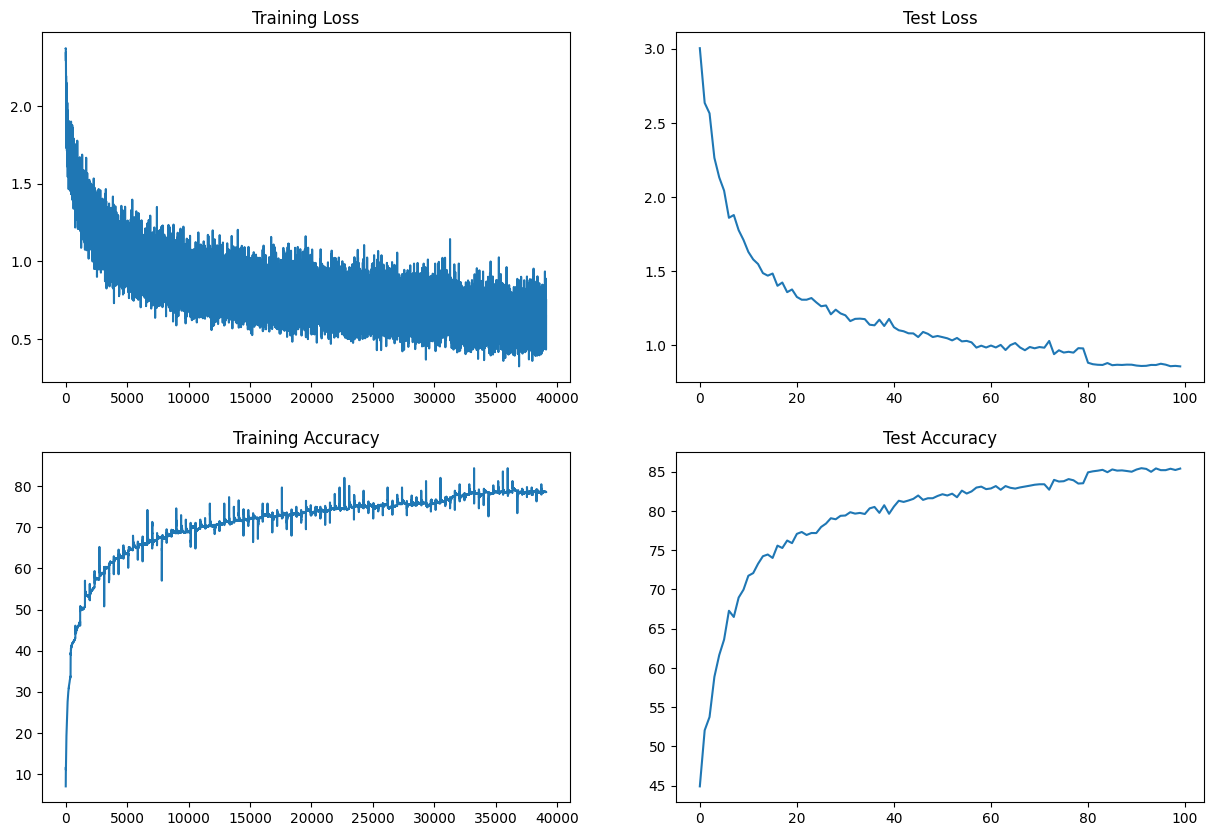

In [9]:
show_accuracy_loss(model.train_losses, model.train_acc, model.test_losses, model.test_acc)

## Plotting miscalssified images after prediction

Misclassified Images:


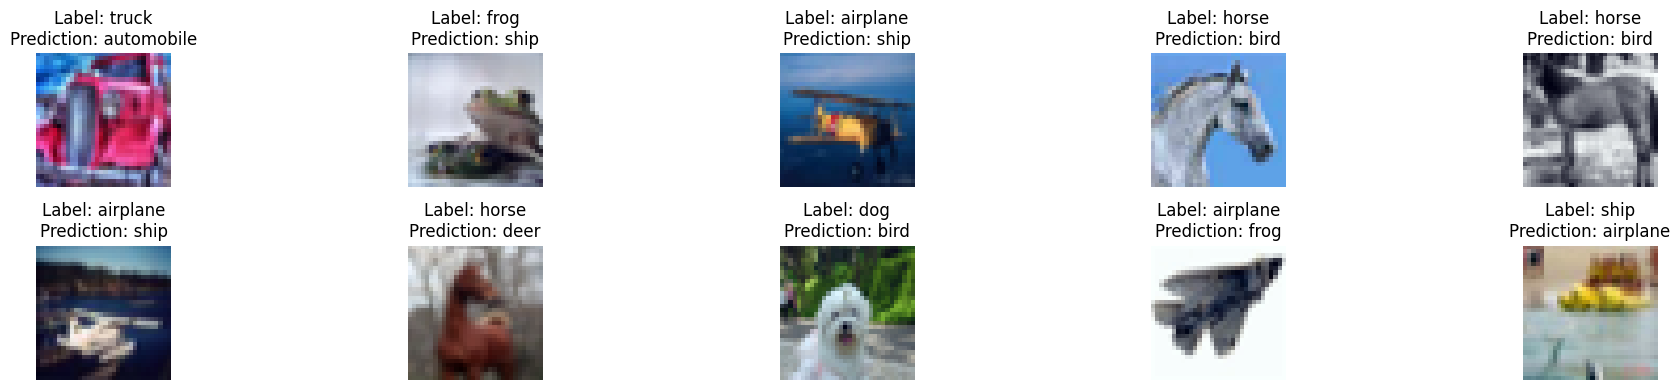

In [11]:
show_misclassified_img(misclassified_images, misclassified_labels, misclassified_predictions, classes)